# 911 Calls Capstone Project

For this capstone project will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)


## Data and Setup 

** importing numpy and pandas **

In [2]:
import numpy as np
import pandas as pd 

** Importing visualization libraries and set %matplotlib inline. **

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

** Reading in the csv file as a dataframe called df **

In [8]:
df = pd.read_csv('911.csv')

** Checking the info() of the df **

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


** Checking the head of df **

In [10]:
df.head(5)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Basic Analysis

** The top 5 zipcodes for 911 calls **

In [18]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

** The top 5 townships (twp) for 911 calls **

In [19]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

** Number of unique title codes **

In [24]:
df['title'].nunique()

110

## Creating new features

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Using .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.**

*For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. *

In [28]:
df['reason']=df['title'].apply(lambda title : title.split(':')[0])

In [29]:
df['reason']

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
          ...   
99487    Traffic
99488    Traffic
99489        EMS
99490        EMS
99491    Traffic
Name: reason, Length: 99492, dtype: object

** The most common Reason for a 911 call based off of this new column **

In [30]:
df['reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: reason, dtype: int64

## Data Visualization 

** creating a countplot of 911 calls by Reason using seaborn library. **

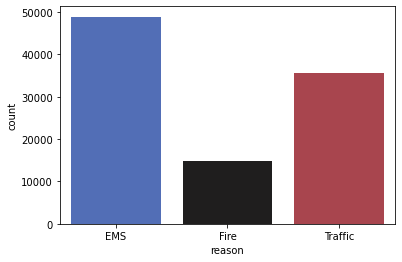

In [43]:
sns.countplot(x=df['reason'], palette='icefire')

** Analysing time information **

*Finding data type of the objects in the timeStamp column*

In [55]:
type(df['timeStamp'].iloc[0])

str

** Using pd.to_datetime to convert the timeStamp column from strings to DateTime objects. **

In [56]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [58]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

**Using .apply() to create 3 new columns called Hour, Month, and Day of Week based off of the timeStamp column**

In [89]:
df['Hour']=df['timeStamp'].apply(lambda time: time.hour)

In [90]:
df['Day of Week']=df['timeStamp'].apply(lambda time: time.dayofweek)

In [91]:
df['Month']=df['timeStamp'].apply(lambda time: time.month)

In [92]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Hour,Day,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,3,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,3,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,3,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,3,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,3,12,3


In [93]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [94]:
df['Day of Week']=df['Day of Week'].map({0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'})

In [88]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Hour,Day,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,3,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,3,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,3,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,3,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,3,12,Thu


** Creating a countplot of the Day of Week column with the hue based off of the Reason column using seaborn. **

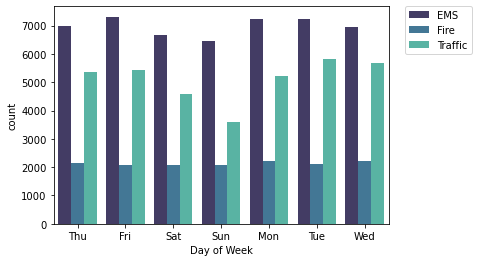

In [107]:
sns.countplot(data=df, x='Day of Week', hue='reason', palette='mako')
#to set legend on top-right side of the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

** Creating a countplot of the Month column with the hue based off of the Reason column using seaborn. **

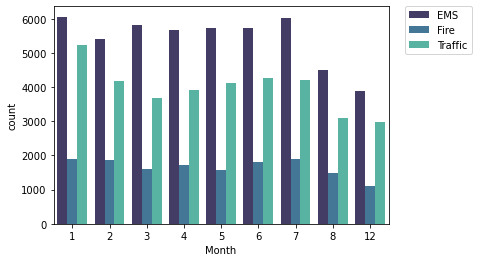

In [109]:
sns.countplot(data=df, x='Month', hue='reason', palette='mako')
#to set legend on top-right side of the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

**Dealing with missing month 9, 10 and 11**

let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months.

** Creating a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame. **

In [113]:
byMonth = df.groupby('Month').count()

In [115]:
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Hour,Day,Day of Week
Month,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423


** Creating a simple plot off of the dataframe indicating the count of calls per month. **

** The plot will show drop of calls between month 8 and 12 **

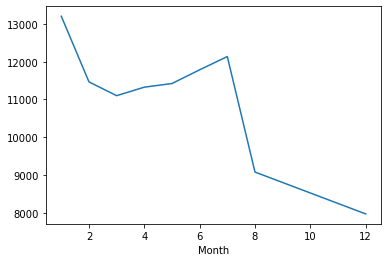

In [117]:
byMonth['lat'].plot()

**Creating linear fit  lmplot() on the number of calls per month.**

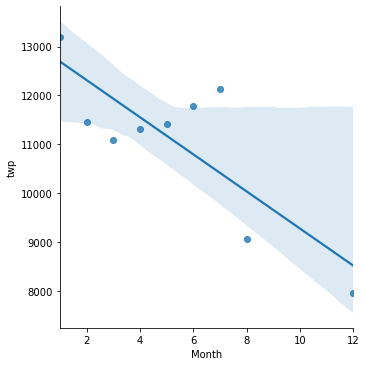

In [121]:
sns.lmplot(data=byMonth.reset_index(), x='Month', y='twp')

*Creating a new column called 'Date' that contains the date from the timeStamp column using apply along with the .date() method.*

In [126]:
df['Date'] = df['timeStamp'].apply(lambda time: time.date())

In [127]:
df.head()


,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Hour,Day,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,3,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,3,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,3,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,3,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,3,12,Thu,2015-12-10


Apply groupby method on Date column with the count() aggregate and create a plot of counts of 911 calls.

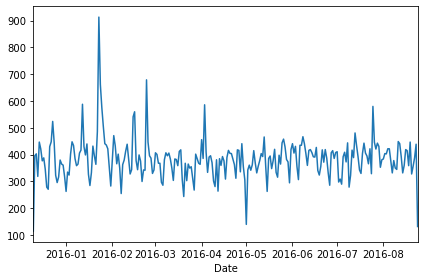

In [152]:
df.groupby('Date').count()['lat'].plot()
plt.autoscale(enable=True, axis='x', tight=True)
plt.tight_layout()

** Recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

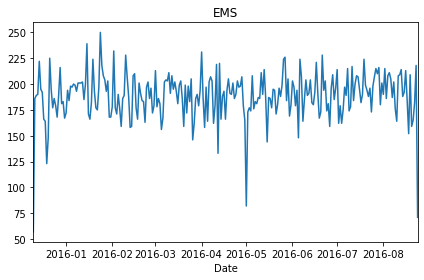

In [163]:
df[df['reason']=='EMS'].groupby('Date').count()['lat'].plot()
plt.title('EMS')
plt.autoscale(enable=True, axis='x', tight=True)
plt.tight_layout()

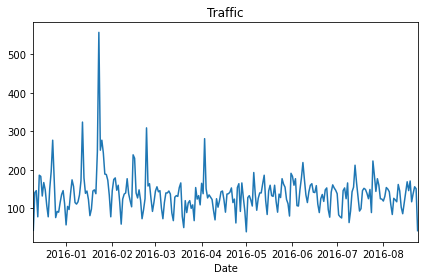

In [162]:
df[df['reason']=='Traffic'].groupby('Date').count()['lat'].plot()
plt.title('Traffic')
plt.autoscale(enable=True, axis='x', tight=True)
plt.tight_layout()

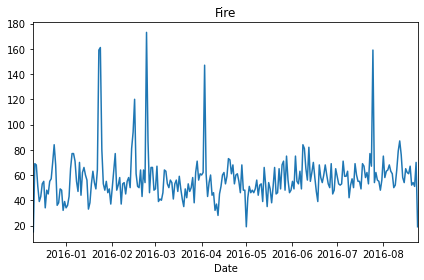

In [164]:
df[df['reason']=='Fire'].groupby('Date').count()['lat'].plot()
plt.title('Fire')
plt.autoscale(enable=True, axis='x', tight=True)
plt.tight_layout()

** Creating  heatmaps with seaborn and our data by restructuring the dataframe so that the columns become the Hours and the Index becomes the Day of the Week using unpack pandas method **

In [168]:
df.groupby(by=['Day of Week', 'Hour']).count()['reason']

Day of Week  Hour
Fri          0       275
             1       235
             2       191
             3       175
             4       201
                    ... 
Wed          19      686
             20      668
             21      575
             22      490
             23      335
Name: reason, Length: 168, dtype: int64

In [173]:
dayHour = df.groupby(by=['Day of Week', 'Hour']).count()['reason'].unstack()

In [174]:
dayHour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


** Now create a HeatMap using this new DataFrame. **

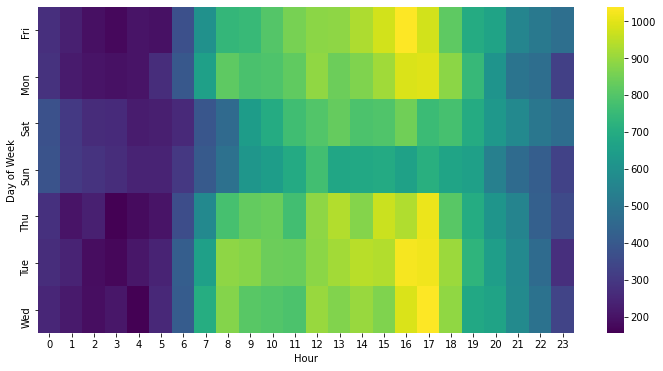

In [181]:
plt.figure(figsize=(12,6))
sns.heatmap(data=dayHour, cmap='viridis')

** Creating a clustermap using this DataFrame. **

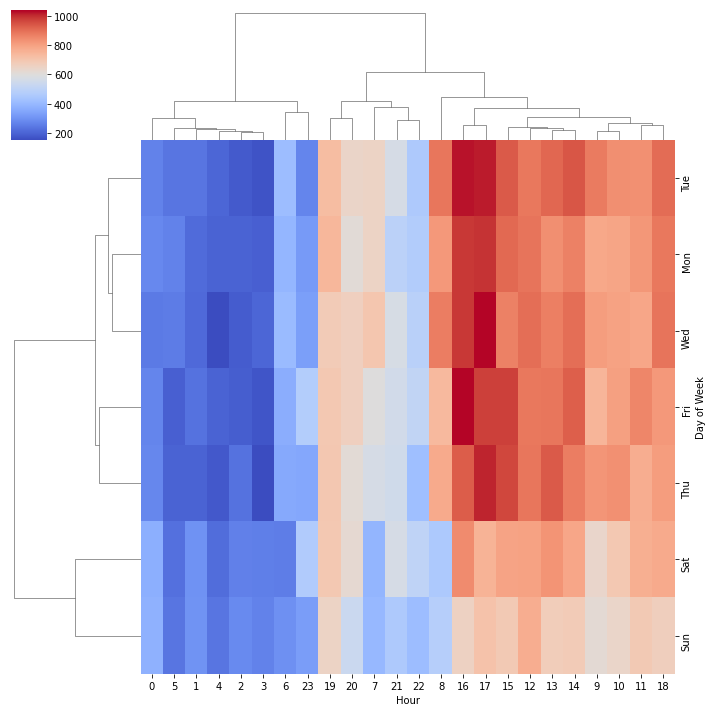

In [180]:
sns.clustermap(dayHour, cmap='coolwarm')

** Repeating these same plots and operations, for a DataFrame that shows the Month as the column. **

In [183]:
df.groupby(by=['Month', 'Hour']).count()['reason']

Month  Hour
1      0       294
       1       218
       2       225
       3       205
       4       205
              ... 
12     19      419
       20      361
       21      305
       22      286
       23      204
Name: reason, Length: 216, dtype: int64

In [185]:
monthHour = df.groupby(by=['Month', 'Hour']).count()['reason'].unstack()

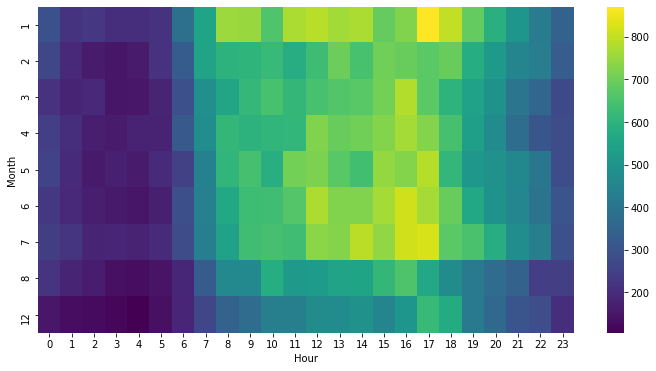

In [186]:
plt.figure(figsize=(12,6))
sns.heatmap(monthHour, cmap='viridis')

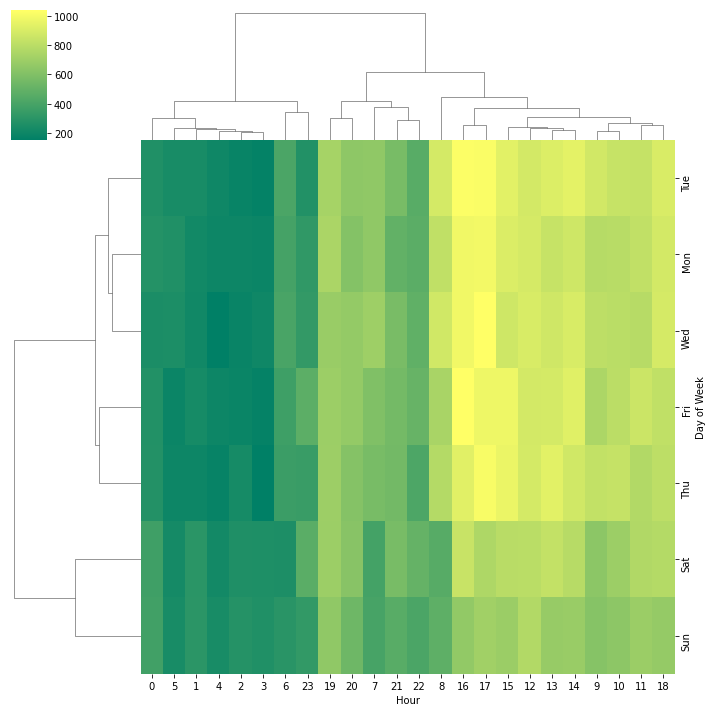

In [190]:
sns.clustermap(dayHour, cmap='summer')

***Thanks you for Reviewing!***